In [27]:
blue = 'C0'
black = 'k'
red = 'C3'
green = 'C2'
purple = 'C4'
orange = 'C2'
gray = 'gray'


import numpy as np
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

#from colors import *

class Polygon2D():
    def __init__(self, *vertices, color=blue, fill=None, alpha=0.4):
        self.vertices = vertices
        self.color = color
        self.fill = fill
        self.alpha = alpha

class Points2D():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow2D():
    def __init__(self, tip, tail=(0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment2D():
    def __init__(self, start_point, end_point, color=blue):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color

# helper function to extract all the vectors from a list of objects
def extract_vectors_2d(objects):
    for object in objects:
        if type(object) == Polygon2D:
            for v in object.vertices:
                yield v
        elif type(object) == Points2D:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow2D:
            yield object.tip
            yield object.tail
        elif type(object) == Segment2D:
            yield object.start_point
            yield object.end_point
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw2d(*objects, origin=True, axes=True, grid=(1,1), nice_aspect_ratio=True,
            width=6, save_as=None):

    all_vectors = list(extract_vectors_2d(objects))
    xs, ys = zip(*all_vectors)

    max_x, max_y, min_x, min_y = max(0,*xs), max(0,*ys), min(0,*xs), min(0,*ys)

    #sizing
    if grid:
        x_padding = max(ceil(0.05*(max_x-min_x)), grid[0])
        y_padding = max(ceil(0.05*(max_y-min_y)), grid[1])

        def round_up_to_multiple(val,size):
            return floor((val + size) / size) * size

        def round_down_to_multiple(val,size):
            return -floor((-val - size) / size) * size

        plt.xlim(floor((min_x - x_padding) / grid[0]) * grid[0],
                ceil((max_x + x_padding) / grid[0]) * grid[0])
        plt.ylim(floor((min_y - y_padding) / grid[1]) * grid[1],
                ceil((max_y + y_padding) / grid[1]) * grid[1])
    else:
        x_padding = 0.05 * (max_x-min_x)
        y_padding = 0.05 * (max_y-min_y)

        plt.xlim(min_x-x_padding,max_x+x_padding)
        plt.ylim(min_y-y_padding,max_y+y_padding)

    if origin:
        plt.scatter([0],[0], color='k', marker='x')

    if grid:
        plt.gca().set_xticks(np.arange(plt.xlim()[0],plt.xlim()[1],grid[0]))
        plt.gca().set_yticks(np.arange(plt.ylim()[0],plt.ylim()[1],grid[1]))
        plt.grid(True)
        plt.gca().set_axisbelow(True)

    if axes:
        plt.gca().axhline(linewidth=2, color='k')
        plt.gca().axvline(linewidth=2, color='k')

    for object in objects:
        if type(object) == Polygon2D:
            if object.color:
                for i in range(0,len(object.vertices)):
                    x1, y1 = object.vertices[i]
                    x2, y2 = object.vertices[(i+1)%len(object.vertices)]
                    plt.plot([x1,x2],[y1,y2], color=object.color)
            if object.fill:
                patches = []
                poly = Polygon(object.vertices, True)
                patches.append(poly)
                p = PatchCollection(patches, color=object.fill)
                plt.gca().add_collection(p)
        elif type(object) == Points2D:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs,ys,color=object.color)
        elif type(object) == Arrow2D:
            tip, tail = object.tip, object.tail
            tip_length = (xlim()[1] - xlim()[0]) / 20.
            length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
            new_length = length - tip_length
            new_y = (tip[1] - tail[1]) * (new_length / length)
            new_x = (tip[0] - tail[0]) * (new_length / length)
            plt.gca().arrow(tail[0], tail[1], new_x, new_y,
            head_width=tip_length/1.5, head_length=tip_length,
            fc=object.color, ec=object.color)
        elif type(object) == Segment2D:
            x1, y1 = object.start_point
            x2, y2 = object.end_point
            plt.plot([x1,x2],[y1,y2], color=object.color)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    fig = matplotlib.pyplot.gcf()

    if nice_aspect_ratio:
        coords_height = (ylim()[1] - ylim()[0])
        coords_width = (xlim()[1] - xlim()[0])
        fig.set_size_inches(width , width * coords_height / coords_width)

    if save_as:
        plt.savefig(save_as)

    plt.show()



from math import sqrt, pi
import matplotlib
import os
from matplotlib.patches import Polygon, FancyArrowPatch
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from colors import *

## https://stackoverflow.com/a/22867877/1704140
class FancyArrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


class Polygon3D():
    def __init__(self, *vertices, color=blue):
        self.vertices = vertices
        self.color = color

class Points3D():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow3D():
    def __init__(self, tip, tail=(0,0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment3D():
    def __init__(self, start_point, end_point, color=blue, linestyle='solid'):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color
        self.linestyle = linestyle

class Box3D():
    def __init__(self, *vector):
        self.vector = vector

# helper function to extract all the vectors from a list of objects
def extract_vectors_3D(objects):
    for object in objects:
        if type(object) == Polygon3D:
            for v in object.vertices:
                yield v
        elif type(object) == Points3D:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow3D:
            yield object.tip
            yield object.tail
        elif type(object) == Segment3D:
            yield object.start_point
            yield object.end_point
        elif type(object) == Box3D:
            yield object.vector
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw3d(*objects, origin=True, axes=True, width=6, save_as=None, azim=None, elev=None, xlim=None, ylim=None, zlim=None, xticks=None, yticks=None, zticks=None,depthshade=False):

    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev,azim=azim)
    
    all_vectors = list(extract_vectors_3D(objects))
    if origin:
        all_vectors.append((0,0,0))
    xs, ys, zs = zip(*all_vectors)

    max_x, min_x = max(0,*xs), min(0,*xs)
    max_y, min_y = max(0,*ys), min(0,*ys)
    max_z, min_z = max(0,*zs), min(0,*zs)

    x_size = max_x-min_x
    y_size = max_y-min_y
    z_size = max_z-min_z

    padding_x = 0.05 * x_size if x_size else 1
    padding_y = 0.05 * y_size if y_size else 1
    padding_z = 0.05 * z_size if z_size else 1

    plot_x_range = (min(min_x - padding_x,-2), max(max_x + padding_x,2))
    plot_y_range = (min(min_y - padding_y,-2), max(max_y + padding_y,2))
    plot_z_range = (min(min_z - padding_z,-2), max(max_z + padding_z,2))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    def draw_segment(start, end, color=black, linestyle='solid'):
        xs, ys, zs = [[start[i],end[i]] for i in range(0,3)]
        ax.plot(xs, ys, zs, color=color, linestyle=linestyle)

    if axes:
        draw_segment((plot_x_range[0],0,0), (plot_x_range[1],0,0))
        draw_segment((0,plot_y_range[0],0), (0,plot_y_range[1],0))
        draw_segment((0,0,plot_z_range[0]), (0,0,plot_z_range[1]))

    if origin:
        ax.scatter([0],[0],[0], color='k', marker='x')

    for object in objects:
        if type(object) == Points3D:
            xs, ys, zs = zip(*object.vectors)
            ax.scatter(xs,ys,zs,color=object.color,depthshade=depthshade)

        elif type(object) == Polygon3D:
            for i in range(0,len(object.vertices)):
                draw_segment(
                    object.vertices[i],
                    object.vertices[(i+1)%len(object.vertices)],
                    color=object.color)

        elif type(object) == Arrow3D:
            xs, ys, zs = zip(object.tail, object.tip)
            a = FancyArrow3D(xs,ys,zs, mutation_scale=20,arrowstyle='-|>', color=object.color)
            ax.add_artist(a)

        elif type(object) == Segment3D:
            draw_segment(object.start_point, object.end_point, color=object.color, linestyle=object.linestyle)

        elif type(object) == Box3D:
            x,y,z = object.vector
            kwargs = {'linestyle':'dashed', 'color':'gray'}
            draw_segment((0,y,0),(x,y,0),**kwargs)
            draw_segment((0,0,z),(0,y,z),**kwargs)
            draw_segment((0,0,z),(x,0,z),**kwargs)
            draw_segment((0,y,0),(0,y,z),**kwargs)
            draw_segment((x,0,0),(x,y,0),**kwargs)
            draw_segment((x,0,0),(x,0,z),**kwargs)
            draw_segment((0,y,z),(x,y,z),**kwargs)
            draw_segment((x,0,z),(x,y,z),**kwargs)
            draw_segment((x,y,0),(x,y,z),**kwargs)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    if xlim and ylim and zlim:
        plt.xlim(*xlim)
        plt.ylim(*ylim)
        ax.set_zlim(*zlim)
    if xticks and yticks and zticks:
        plt.xticks(xticks)
        plt.yticks(yticks)
        ax.set_zticks(zticks)
        
    if save_as:
        plt.savefig(save_as)

    plt.show()


from math import sqrt, sin, cos, acos, atan2

# def add(v1,v2):
#     return (v1[0] + v2[0], v1[1] + v2[1])



# def add(*vectors):
#     by_coordinate = zip(*vectors)
#     coordinate_sums = [sum(coords) for coords in by_coordinate]
#     return tuple(coordinate_sums)

def add(*vectors):
    return tuple(map(sum,zip(*vectors)))
    
def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

def distance(v1,v2):
    return length(subtract(v1,v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

def angle_between(v1,v2):
    return acos(
                dot(v1,v2) /
                (length(v1) * length(v2))
            )

def cross(u, v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

def component(v,direction):
    return (dot(v,direction) / length(direction))

def unit(v):
    return scale(1./length(v), v)



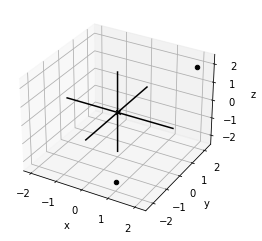

In [28]:

'''
3D Drawing with Python: The x, y, z axes that are drawn are perpendicular in the space, despite being skewed ny our perspective.
    The origin in (0,0,0) and the axes emanate from it in the positive and negative x, y, z directions.


Example:
    To plot the vectors (2, 2, 2) & (1, -2, -2) with the following code that produces figure 3.10:

'''
draw3d(
Points3D((2, 2, 2), (1, -2, -2))
)
    


In [29]:
"""
To visualize these vectorss instead as arrows, we can represent the vectors as Arrow3D objects.
We can also connect the tips of arrows with a Segment3D object as follows
"""


draw3d(
Points3D((2, 2, 2), (1, -2, -2)),
Arrow3D((2, 2, 2)),
Arrow3D((1, -2, -2)),
Segment3D((2, 2, 2), (1, -2, -2))
)

AttributeError: 'FancyArrow3D' object has no attribute 'do_3d_projection'

<Figure size 432x288 with 1 Axes>

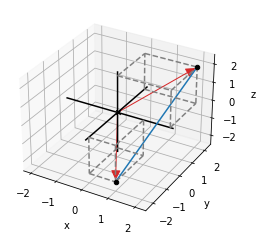

In [ ]:
# To represent a box with one corner at the origin and the opposite one at a given point

draw3d(
    Points3D((2, 2, 2), (1,-2,-2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1, -2, -2)),
    Box3D(2,2,2),
    Box3D(1, -2, -2)
    )

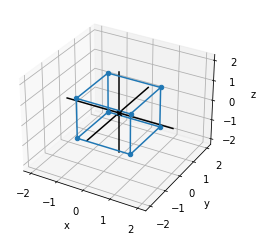

In [ ]:
"""
With exactly eight 3D vectors whose coordinates are all either +1 or -1. For instance (1, -1, 1) is one of these.
Plot all off these eight vector points. Then figure out how to commect them with line segments using Segment3D objects to form the outline of a cube.
"""

pm1 = [1,-1]

vectices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1] + \
            [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1] +\
            [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vectices, color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [ ]:
"""
Adding Vectors in 3D.

A concise function to sum any number of input vectors,
and works in all Ds.
"""

def add(*vectors):
    by_cords = zip(*vectors)
    cordsSum = [sum(coords) for coords in by_cords]
    return tuple(cordsSum)



In [ ]:
coords = (list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)])))

display(coords)

display([sum(coords) for coords in [(1,1,3),(2,4,-4),(4,2,-2)]])

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

[5, 2, 4]

In [ ]:

def quickadd(*vectors):
    return tuple(map(sum, zip(*vectors)))

In [ ]:
# Computing lengths and distances:

from math import sqrt

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))


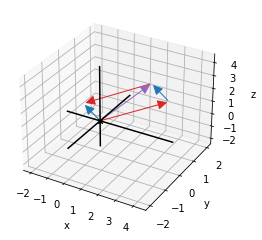

In [ ]:

add((4,0,3), (-1,0,1))

draw3d(
Arrow3D((4,0,3), color=red),
Arrow3D((-1,0,1), color=blue),
Arrow3D((3,0,4), (4,0,3), color=blue),
Arrow3D((-1,0,1), (3,0,4), color=red),
Arrow3D((3,0,4), color=purple)
)

In [ ]:
"""
with vectors v1 = [(1,2,3,4,5), (6,7,8,9,10)] & v2 = [(1,2),(3,4),(5,6)]
lengths of zip(*vectors1) and  zip (*vectors2)

    * means all of them
"""

# solution 

v1 = [(1,2,3,4,5), (6,7,8,9,10)]

v2 = [(1,2),(3,4),(5,6)]

print(len(list(zip(*v1))))

print(len(list(zip(*v2))))

5
2


(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


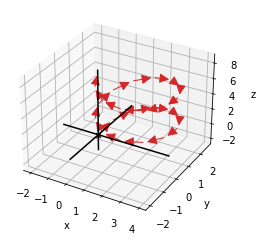

In [ ]:


# Mini Project 

from math import sin, cos, pi

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

# Drawing these vectors tip-tp-tail

running_sum = (0,0,0)

arrows = []

for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum
    
print(running_sum)

draw3d(*arrows)

In [ ]:
"""A function that returns the input scalar time the input vector

With a comprehension, we multiply each coordinate in the vector by scalar"""

def scale(scalar, v):
    return tuple(scalar * coord for coord in v)

In [ ]:
"""
**Mini project:** The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number.
This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number.
Find a different triple of whole numbers that define coordinates of a vector with whole number length.
"""

def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)


list(vectors_with_whole_number_length())[:5]

[(2, 2, 1), (4, 4, 2), (6, 3, 2), (6, 6, 3), (7, 4, 4)]

Computing the dot product

Given the coordinates for two vectors, there's a simple to compute the dot product.

* multiply the corresponding coordinates and then add the products. 
    Example dot products (1, 2, -1) . (3, 0, 3) the product of the x-coords is 3, product of y-coords is 0, z-coord is -3.
        The sum is 3 + 0 + (-3) = 0

Part 2

The dot product has an alternative formula.
* If |u| and |v| denote the lengths of vectors u and v, the dot product is given by
    u * v = |u| * |v| * cos(0) # where 0 is the angle between the vectors u and v.

This allows to compute the dot product via measuring the lengths of two vectors u and v,
then measuring the angle between them.



In [30]:
def dotProd(u ,v):
    return sum([coords1 * coords2 for coords1,coords2 in zip(u,v)])


display(dot((1,0),(0,2)))

display(dot((0,3,0),(0,0,-5)))

0

0

In [31]:
# Part 2 

from math import cos, pi 

3 * 2 * cos(75 * pi / 180)



1.5529142706151244

In [32]:

"""

When doing computation with vectors, we start with coordds and compute angle from them.
    This formula in Python.

"""
def angle_between(v1,v2):
    return acos(
        dot(v1,v2) /
        (length(v1) * length(v2))
    )


In [33]:
# The cross product: Measuring oriented area
# Computing the cross product of 3D vectors

# u x v  = (UyUz  - UzVy, UzVx- UxVz, UxVy  - UyVx)

def cross(u, v):
    ux, uy, uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy , uz*vx - ux*vz,ux*vy - uy*vx)



display(cross((0,0,1), (1,2,3)),
        cross((0,0,1), (-1,-1,0)),
        cross((0,0,1),  (1,-1,5)))


# Defining a 3D object with vectors 


(-2, 1, 0)

(1, -1, 0)

(1, 1, 0)

In [42]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)
                    
                    
                    
list(vectors_with_whole_number_length())[3]

(6, 6, 3)

In [34]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [36]:
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

In [53]:


octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]


In [ ]:

def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))


def component(v,direction):
    return (dot(v,direction) / length(direction))


def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

blues = matplotlib.cm.get_cmap('Blues')

def unit(v):
    return scale(1./length(v), v)

def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [56]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

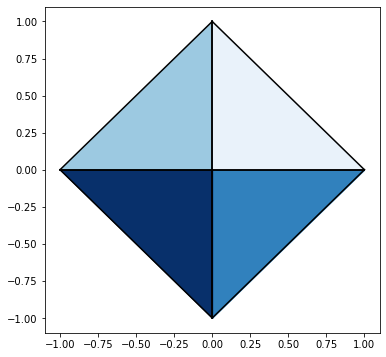

In [57]:

render(octahedron, color_map=matplotlib.cm.get_cmap("Blues"), lines=black)

In [58]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)




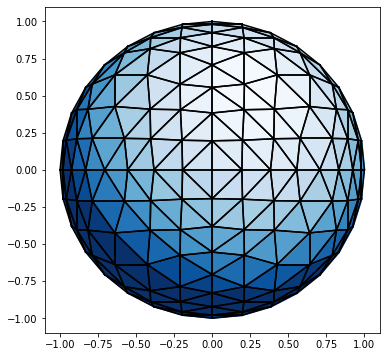

In [60]:
render(sphere_approx(3), lines='k')


In [ ]:
# Chapter four: Transforming vectors and graphics

